In [5]:
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider.backends()

/Users/weit/Documents/circuit_cutting/venv/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:178: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0,1,2], range(3))
print(circ)

        ┌───┐          ┌─┐      
q_0: |0>┤ H ├──■───────┤M├──────
        └───┘┌─┴─┐     └╥┘┌─┐   
q_1: |0>─────┤ X ├──■───╫─┤M├───
             └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: |0>──────────┤ X ├─╫──╫─┤M├
                  └───┘ ║  ║ └╥┘
 c_0: 0 ════════════════╩══╬══╬═
                           ║  ║ 
 c_1: 0 ═══════════════════╩══╬═
                              ║ 
 c_2: 0 ══════════════════════╩═
                                


NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['measure', 'u3', 'u2', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
  Specific qubit errors: [('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u2', [5]), ('u2', [6]), ('u2', [7]), ('u2', [8]), ('u2', [9]), ('u2', [10]), ('u2', [11]), ('u2', [12]), ('u2', [13]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('u3', [5]), ('u3', [6]), ('u3', [7]), ('u3', [8]), ('u3', [9]), ('u3', [10]), ('u3', [11]), ('u3', [12]), ('u3', [13]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [2, 3]), ('cx', [4, 3]), ('cx', [4, 10]), ('cx', [5, 4]), ('cx', [5, 6]), ('cx', [5, 9]), ('cx', [6, 8]), ('cx', [7, 8]), ('cx', [9, 8]), ('cx', [9, 10]), ('cx', [11, 3]), ('cx', [11, 10]), ('cx', [11, 12]), ('cx', [12, 2]), ('cx', [13, 1]), ('cx', [13, 12]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4]), ('measure', [5]), ('measure', [6]), 

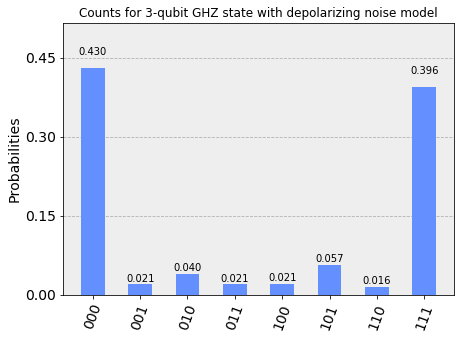

In [7]:
device = provider.get_backend('ibmq_16_melbourne')
properties = device.properties()
coupling_map = device.configuration().coupling_map
gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)
print(noise_model)

basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with depolarizing noise model")